<a href="https://colab.research.google.com/github/timhalter/BA-NeuralFunk/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# for debugging only -> https://zohaib.me/debugging-in-google-collab-notebook/
# to set a breakpoint use the following method -> ipdb.set_trace(context=6)
!pip install -Uqq ipdb
import ipdb

In [ ]:
import librosa
import librosa.display
from scipy import signal
import numpy as np
from glob import glob
import os
import sys
import time
import random
from random import shuffle
from tqdm import tqdm
from tqdm import tnrange, tqdm_notebook
import pickle as pkl
import joblib
import matplotlib.pyplot as plt
%matplotlib inline

N_FFT = 1024
HOP_LENGTH = 256 
SAMPLING_RATE = 16000
MELSPEC_BANDS = 128

sample_secs = 2
num_samples = int(sample_secs * SAMPLING_RATE)

# Function to read in an audio file and return a mel spectrogram
def get_melspec(filepath_or_audio, hop_length=HOP_LENGTH, n_mels=MELSPEC_BANDS, n_samples=None, sample_secs=None):

    y_tmp = np.zeros(n_samples)
    
    # Load a little more than necessary as a buffer
    load_duration = None if sample_secs == None else 1.1 * sample_secs
    
    # Load audio file or take given input
    if type(filepath_or_audio)==str:
        y, sr = librosa.core.load(filepath_or_audio, sr = SAMPLING_RATE, mono=True, duration=load_duration)
    else:
        y = filepath_or_audio
        sr = SAMPLING_RATE
    
    # Truncate or pad
    if n_samples:
        ipdb.set_trace(context=6)
        if len(y) >= n_samples:
            y_tmp = y[:n_samples]
            lentgh_ratio = 1.0
        else:
            y_tmp[:len(y)] = y
            lentgh_ratio = len(y)/n_samples
        
    else:
        ipdb.set_trace(context=6)
        y_tmp = y
        length_ratio = 1.0        
        
    # sfft -> mel conversion
    melspec = librosa.feature.melspectrogram(y=y_tmp, sr=sr,
                n_fft=N_FFT, hop_length=hop_length, n_mels=n_mels)
    S = librosa.power_to_db(melspec, np.max) 
        
    return S, lentgh_ratio

In [ ]:
test_file = '/content/Fluffy Darabuka.wav'
# test_file = '/Users/Shared/Maschine 2 Library/Samples/Instruments/Wind/Wodden Flute Samples/Wodden Flute A2.wav'
spec, _ = get_melspec(test_file, n_samples=num_samples)
print(spec.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(spec, sr=SAMPLING_RATE, y_axis='mel', x_axis='time', hop_length=HOP_LENGTH)
plt.colorbar(format='%+2.0f dB')
plt.title('Amen Break Mel Spectrogram')
plt.tight_layout()

> <ipython-input-18-93cabfebb83b>(44)get_melspec()
     41     # Truncate or pad
     42     if n_samples:
     43         ipdb.set_trace(context=6)
---> 44         if len(y) >= n_samples:
     45             y_tmp = y[:n_samples]
     46             lentgh_ratio = 1.0

array([1.0000000e+00, 8.4142452e-01, 7.5270224e-01, ..., 2.7829516e-04,
       3.0459856e-04, 2.9360715e-03], dtype=float32)
32000
32000


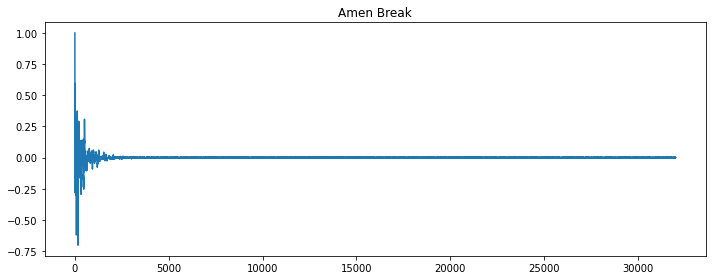

In [ ]:
y, _ = librosa.core.load('/content/Fluffy Darabuka.wav', sr = SAMPLING_RATE, mono=True, duration=3.0)
plt.figure(figsize=(10, 4))
plt.plot(y)
# plt.colorbar(format='%+2.0f dB')
plt.title('Amen Break')
plt.tight_layout()

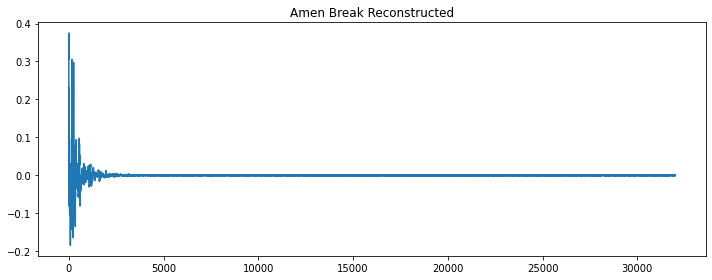

In [ ]:
from griffin_lim import griffin_lim
import soundfile as sf

reconstructed = griffin_lim(spec, 50, 0.1, N_FFT, HOP_LENGTH)
plt.figure(figsize=(10, 4))
plt.plot(reconstructed)
# plt.colorbar(format='%+2.0f dB')
plt.title('Amen Break Reconstructed')
plt.tight_layout()
sf.write('recon.wav', reconstructed/np.max(reconstructed), samplerate=SAMPLING_RATE)

# librosa.output was removed in librosa version 0.8.0 -> new: soundfile.write
# librosa.output.write_wav('recon.wav',reconstructed/np.max(reconstructed),sr=SAMPLING_RATE)